<a href="https://colab.research.google.com/github/ch1oelewis/Hypothesis-Test-Quiz-in-R/blob/main/Learner_Notebook_Full_Code_ChloeLewis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis
Chloe Lewis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [4]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

In [6]:
import pandas as pd
import matplotlib

# Check pandas version
print("Pandas version:", pd.__version__)

# Check matplotlib version
print("Matplotlib version:", matplotlib.__version__)

Pandas version: 2.2.2
Matplotlib version: 3.8.0


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [7]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [8]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
from google.colab import files
uploaded = files.upload()

#to read csv from a computer file
import pandas as pd
df = pd.read_csv('foodhub_order.csv')

Saving foodhub_order.csv to foodhub_order (1).csv


In [12]:
print(df.head())

   order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24  


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [13]:
rows, columns = df.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 1898
Number of columns: 9


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [15]:
nullvalues= df.isnull().sum()
print(nullvalues)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:
There were no null values detected in the DataFrame; however, certain variables have insufficient responses. For example, some entries in the rating column contain a significant number of rows with the 'Not Given' response, indicating that ratings were not provided.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [16]:
summary = df.describe()
print(summary)

           order_id    customer_id  cost_of_the_order  food_preparation_time  \
count  1.898000e+03    1898.000000        1898.000000            1898.000000   
mean   1.477496e+06  171168.478398          16.498851              27.371970   
std    5.480497e+02  113698.139743           7.483812               4.632481   
min    1.476547e+06    1311.000000           4.470000              20.000000   
25%    1.477021e+06   77787.750000          12.080000              23.000000   
50%    1.477496e+06  128600.000000          14.140000              27.000000   
75%    1.477970e+06  270525.000000          22.297500              31.000000   
max    1.478444e+06  405334.000000          35.410000              35.000000   

       delivery_time  
count    1898.000000  
mean       24.161749  
std         4.972637  
min        15.000000  
25%        20.000000  
50%        25.000000  
75%        28.000000  
max        33.000000  


#### Observations: According to the summary, it takes a minimum of 20 minutes to prepare food, an average time of 27 minutes, and it takes a maximum of 35 minutes to prepare food.


### **Question 5:** How many orders are not rated? [1 mark]

In [17]:
df.loc[df['rating']=='Not given']

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34,28
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,Not given,23,30
...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.82,Weekend,Not given,26,30
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24


#### Observations: There are 736 rows in this data frame that do not have ratings.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

--- Univariate Analysis for cost_of_the_order ---
Descriptive Statistics:
count    1162.000000
mean       16.760766
std         7.572578
min         4.470000
25%        12.130000
50%        14.600000
75%        22.750000
max        35.410000
Name: cost_of_the_order, dtype: float64




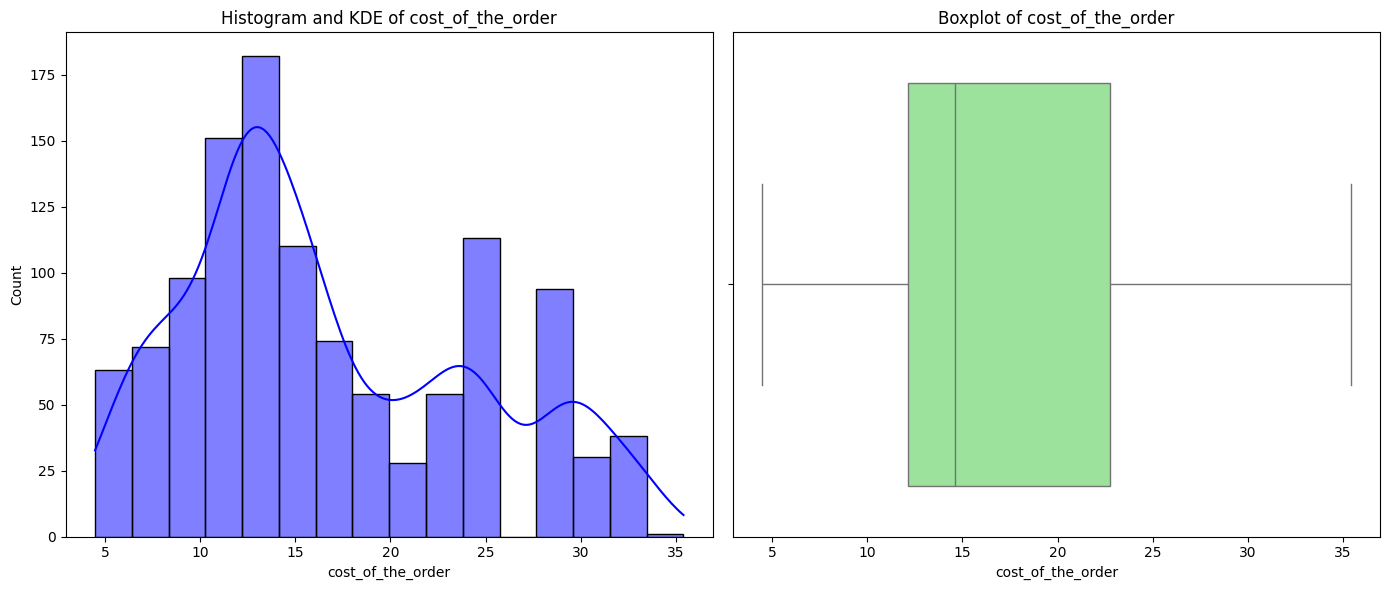

In [70]:
def univariate_analysis_numerical(df, col):
    print(f"--- Univariate Analysis for {col} ---")
    print(f"Descriptive Statistics:\n{df[col].describe()}")
    print("\n")

    # Plot histogram and boxplot for the numerical variable
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Histogram and KDE (Kernel Density Estimate)
    sns.histplot(df[col], kde=True, ax=axes[0], color='blue')

    sns.boxplot(x=df[col], ax=axes[1], color='lightgreen')

    axes[0].set_title(f"Histogram and KDE of {col}")
    axes[1].set_title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()

univariate_analysis_numerical(df, 'cost_of_the_order')

observation: The range of order costs, from $4.47 to $35.41, is fairly wide, suggesting that there are both inexpensive and premium orders in the dataset. There is a right skewed distribution. It is clear that lower priced food is more common than the higher priced food even though there are some outliers in the higher priced food histogram in the last bin on the right.

--- Univariate Analysis for rating ---
Descriptive Statistics:
count    1162.000000
mean        4.344234
std         0.741478
min         3.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64




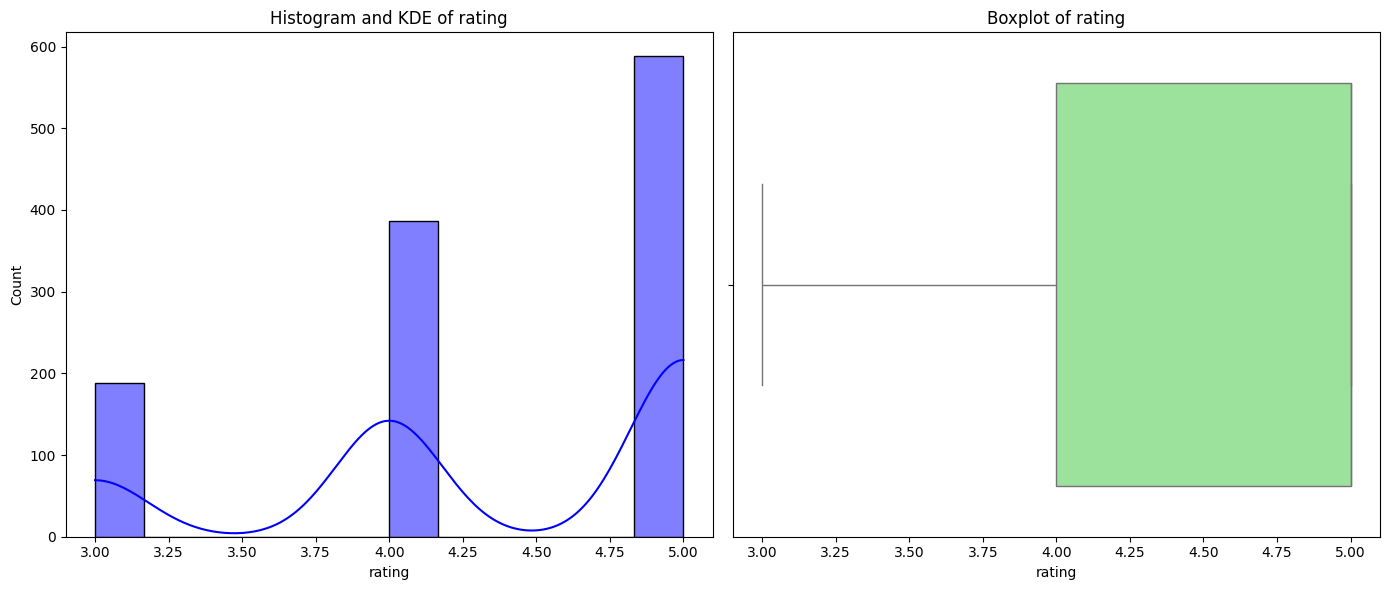

In [71]:
def univariate_analysis_numerical(df, col):
    print(f"--- Univariate Analysis for {col} ---")
    print(f"Descriptive Statistics:\n{df[col].describe()}")
    print("\n")

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    sns.histplot(df[col], kde=True, ax=axes[0], color='blue')

    sns.boxplot(x=df[col], ax=axes[1], color='lightgreen')

    axes[0].set_title(f"Histogram and KDE of {col}")
    axes[1].set_title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()

    df = df[df['rating'] != 'not given']
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

univariate_analysis_numerical(df, 'rating')

observations: With a mean rating of 4.34 and that 75% of ratings are 5 or below suggests that customers are extremely satisfied based on the data. The one thing I will say is there are a fair amount of "no rating given" values in the dataset but the fact that the minimum reported rating is a 3 means that nobody hated the food enough to give it a horrible rating. Nuetral rating is better than a bad rating.

--- Univariate Analysis for food_preparation_time ---
Descriptive Statistics:
count    1162.000000
mean       27.381239
std         4.677922
min        20.000000
25%        23.000000
50%        27.000000
75%        32.000000
max        35.000000
Name: food_preparation_time, dtype: float64




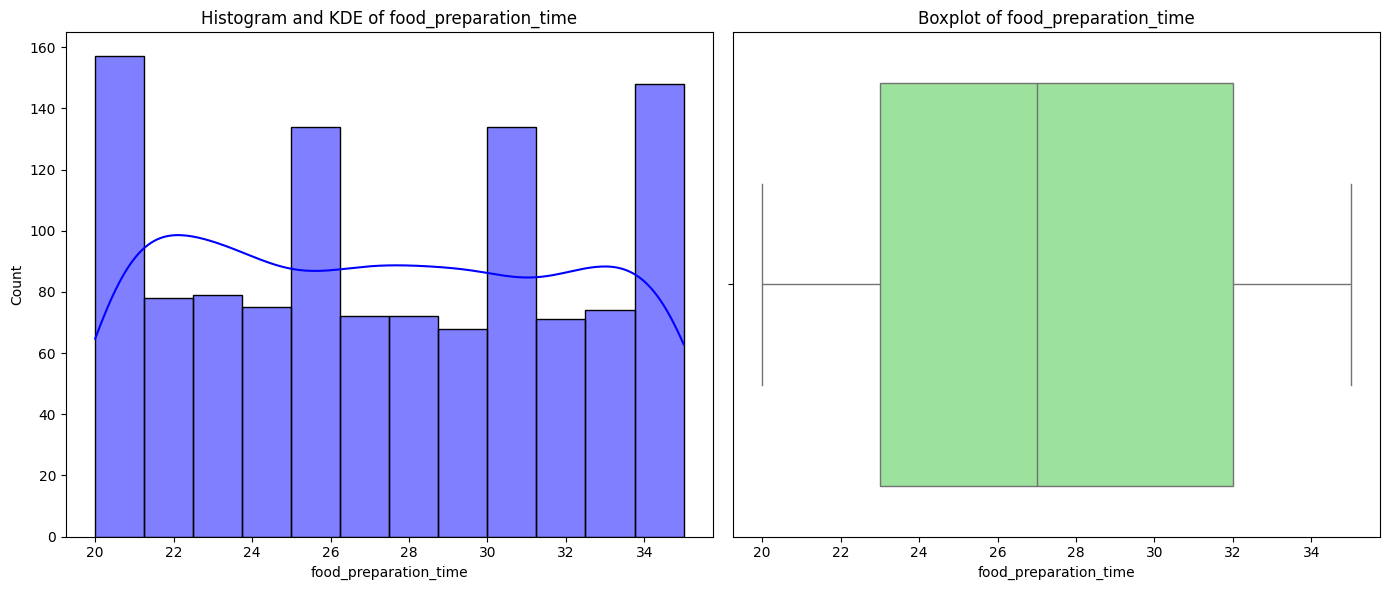

In [72]:
def univariate_analysis_numerical(df, col):
    print(f"--- Univariate Analysis for {col} ---")
    print(f"Descriptive Statistics:\n{df[col].describe()}")
    print("\n")

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    sns.histplot(df[col], kde=True, ax=axes[0], color='blue')

    sns.boxplot(x=df[col], ax=axes[1], color='lightgreen')

    axes[0].set_title(f"Histogram and KDE of {col}")
    axes[1].set_title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()

univariate_analysis_numerical(df, 'food_preparation_time')

observations: The range of food preparation times is from 20 minutes to 35 minutes, meaning most orders fall within a 15-minute window. While the median is close to the mean, the fact that the 75th percentile is 32 minutes and the maximum is 35 minutes indicates that the upper half of the distribution might have more spread compared to the lower half. This suggests that there may be a slight right-skew in the distribution but it is kind of hard to see that on the histogram, it is more clear on the boxplot but again it is not very noticible.

--- Univariate Analysis for delivery_time ---
Descriptive Statistics:
count    1162.000000
mean       24.154045
std         4.930999
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64




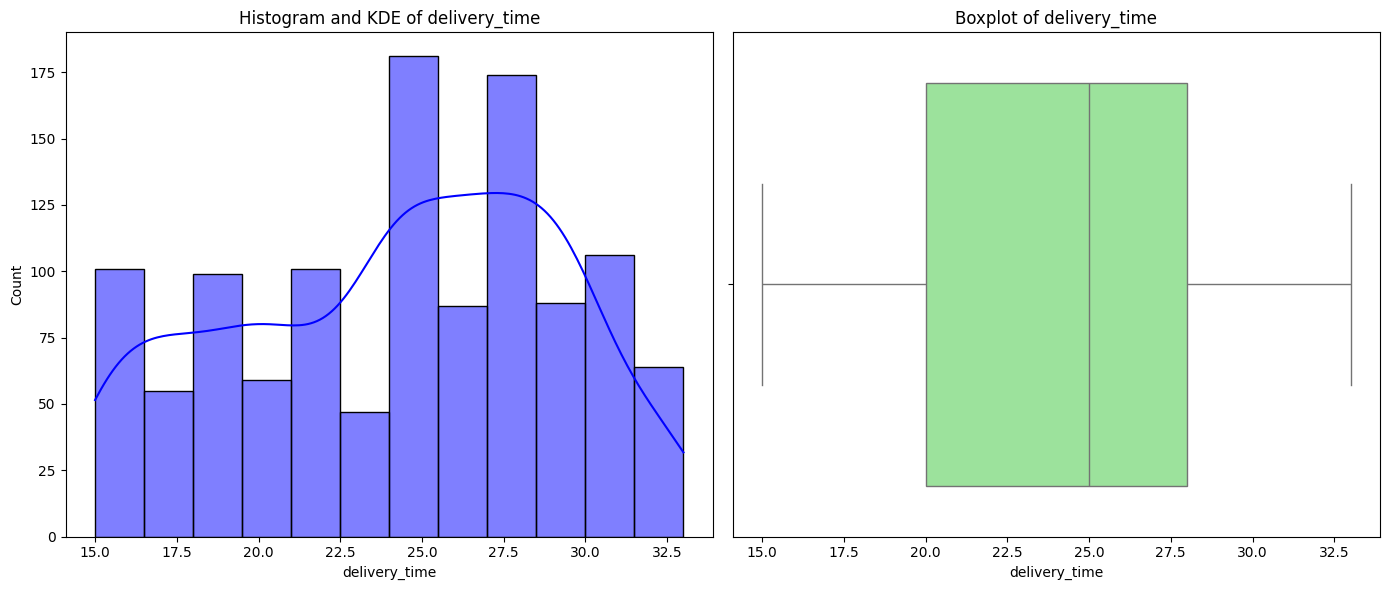

In [73]:
def univariate_analysis_numerical(df, col):
    print(f"--- Univariate Analysis for {col} ---")
    print(f"Descriptive Statistics:\n{df[col].describe()}")
    print("\n")

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    sns.histplot(df[col], kde=True, ax=axes[0], color='blue')

    sns.boxplot(x=df[col], ax=axes[1], color='lightgreen')

    axes[0].set_title(f"Histogram and KDE of {col}")
    axes[1].set_title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()

univariate_analysis_numerical(df, 'delivery_time')

observations:The distribution of delivery times may be right-skewed, meaning there are a few deliveries that take significantly longer, towards the higher end of the range.

A pie chart or histogram is great for showing categorical data however it is hard to display all of the resturant names visually. There are far too many resturants in this dataframe to display all of them. Instead it might be better to examine a few of them at a time or aggregate the data. Even though this graph is not very great, it does show us that the majority of people in this data set like to order from shake shack.

--- Univariate Analysis for cuisine_type ---
Value Counts:
cuisine_type
American          368
Japanese          273
Italian           172
Chinese           133
Indian             50
Mexican            48
Middle Eastern     34
Mediterranean      32
Southern           13
French             10
Thai                9
Korean              9
Spanish             6
Vietnamese          5
Name: count, dtype: int64




<ipython-input-85-f92ddc698d12>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[col], ax=axes[0], palette='Set2')
<ipython-input-85-f92ddc698d12>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


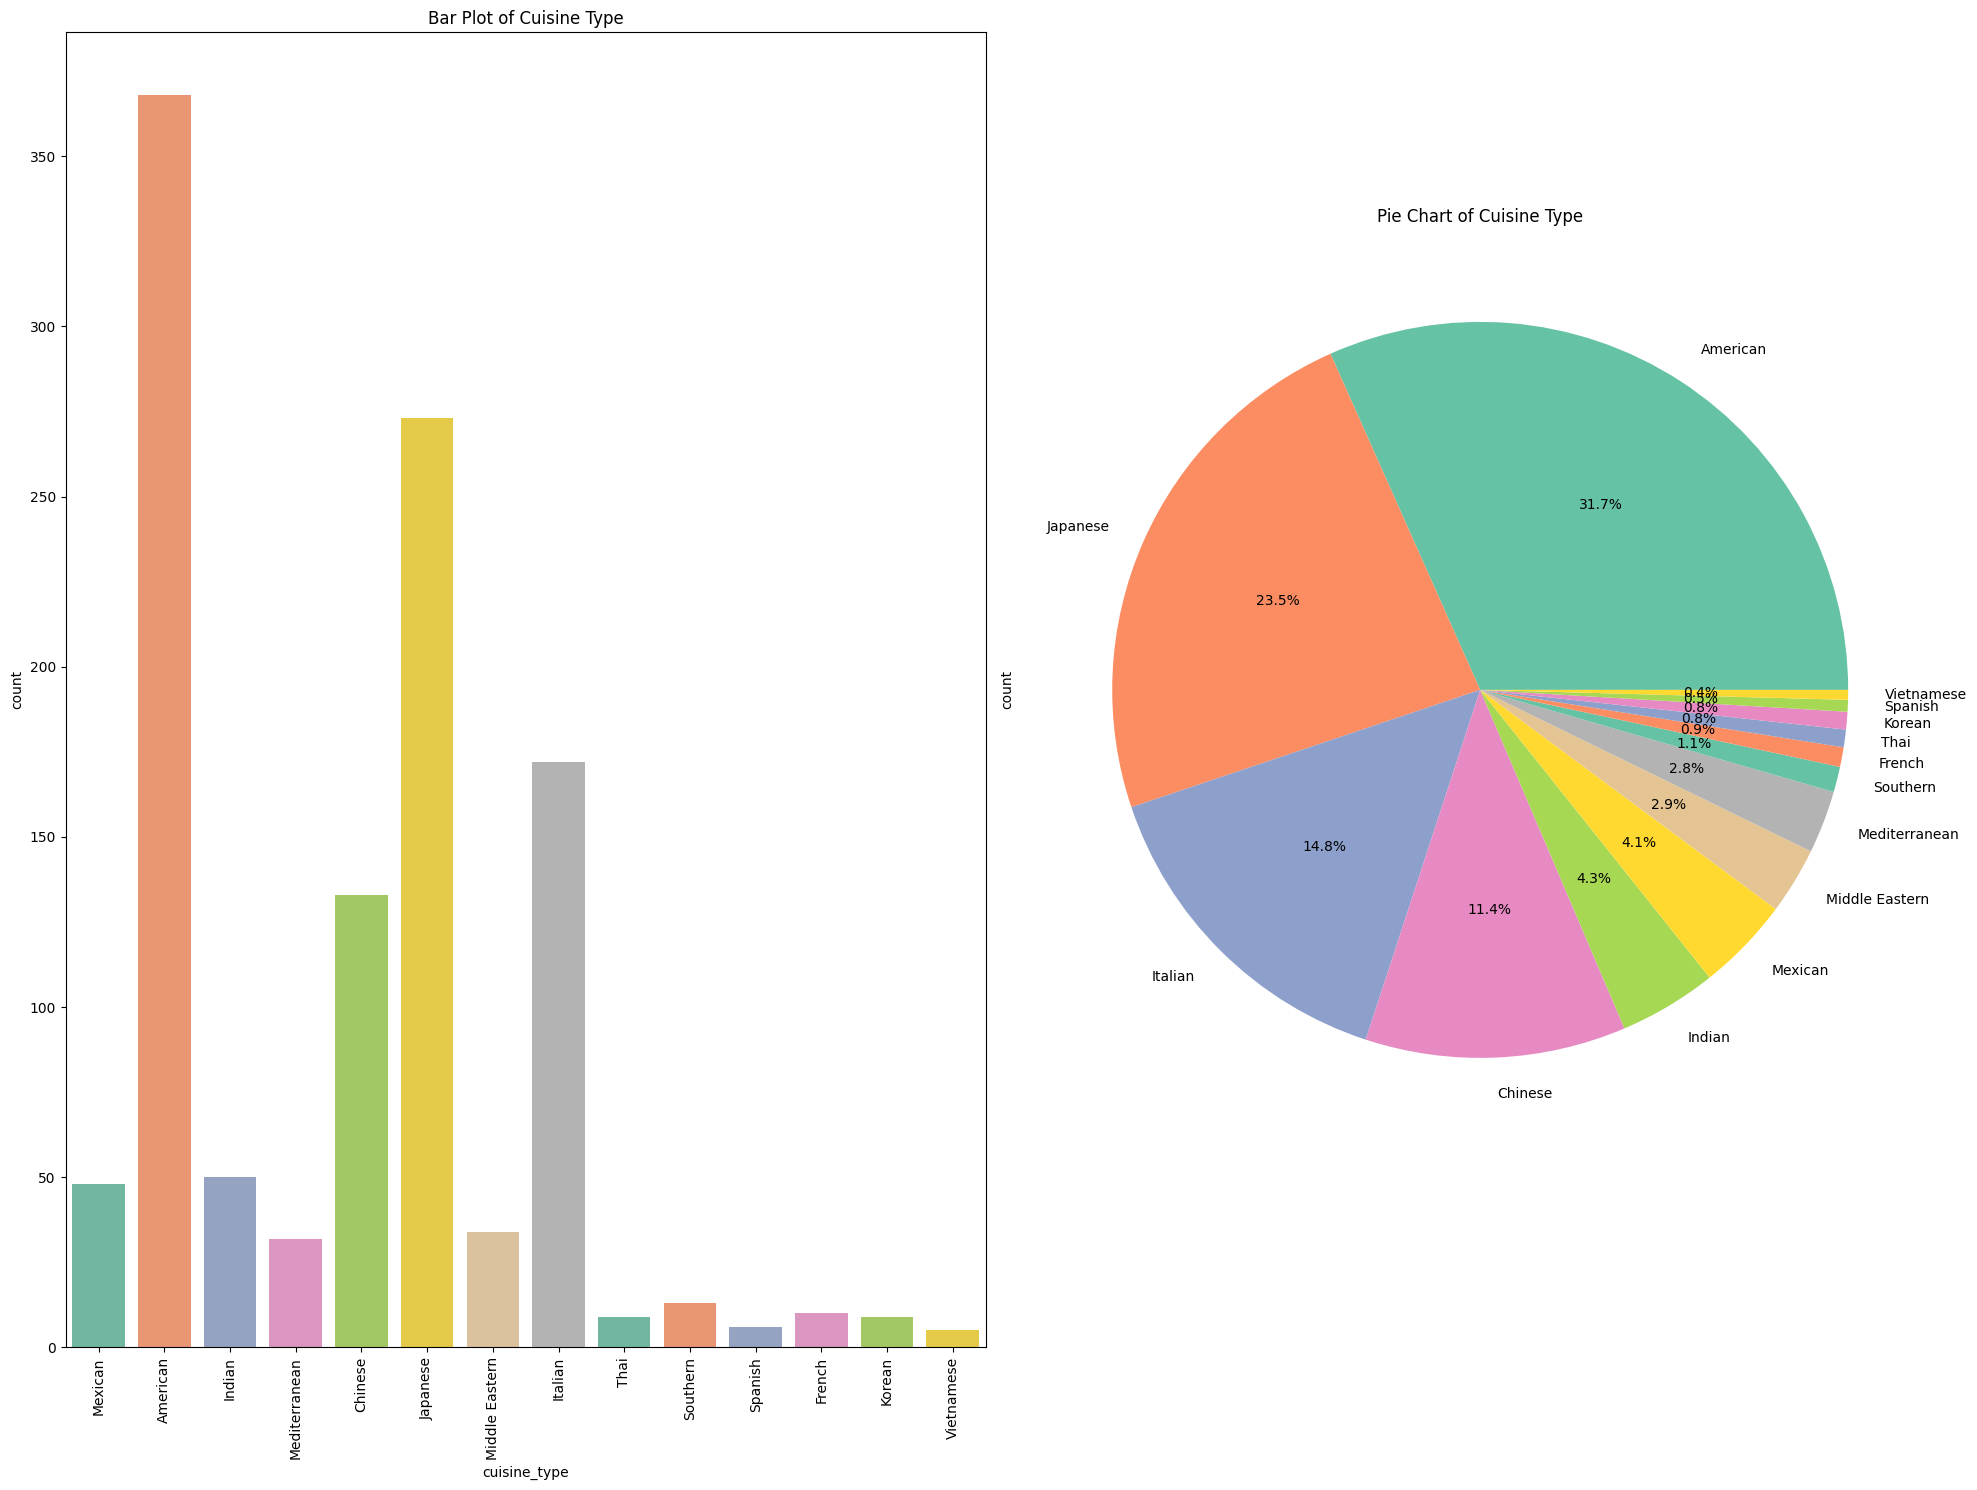

In [85]:
def univariate_analysis_categorical(df, col):
    print(f"--- Univariate Analysis for {col} ---")
    print(f"Value Counts:\n{df[col].value_counts()}")
    print("\n")

    # Plotting the bar chart and pie chart for the categorical variable
    fig, axes = plt.subplots(1, 2, figsize=(20, 15))

    # Count Plot (Bar Chart)
    ax = sns.countplot(x=df[col], ax=axes[0], palette='Set2')

    # Rotate x-axis labels using ax.set_xticklabels(rotation=90)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    # Pie Chart
    df[col].value_counts().plot.pie(ax=axes[1], autopct='%1.1f%%', colors=sns.color_palette("Set2", len(df[col].unique())))

    # Set titles
    axes[0].set_title(f"Bar Plot of Cuisine Type")
    axes[1].set_title(f"Pie Chart of Cuisine Type")

    # Show the plots
    plt.tight_layout()
    plt.show()

univariate_analysis_categorical(df, 'cuisine_type')

Seems like American, Japanese, and Italian are the top 3 favorite cuisine types in this data frame.

--- Univariate Analysis for day_of_the_week ---
Value Counts:
day_of_the_week
Weekend    822
Weekday    340
Name: count, dtype: int64




<ipython-input-86-63ea50cc12f7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[col], ax=axes[0], palette='Set2')
<ipython-input-86-63ea50cc12f7>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


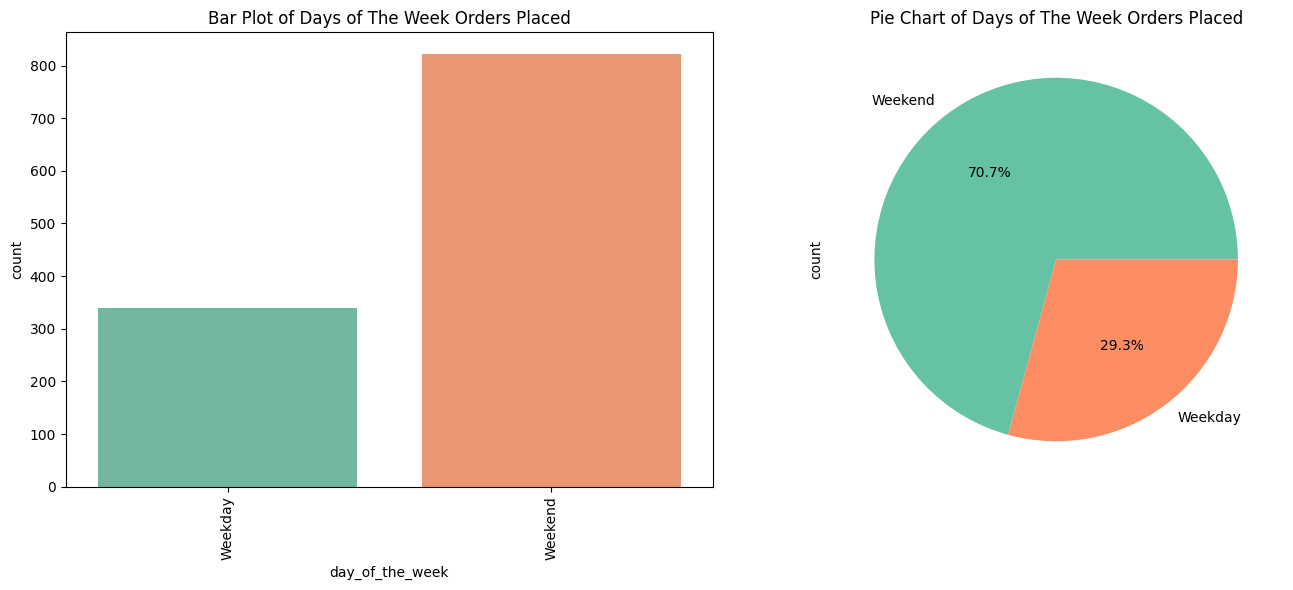

In [86]:
def univariate_analysis_categorical(df, col):
    print(f"--- Univariate Analysis for {col} ---")
    print(f"Value Counts:\n{df[col].value_counts()}")
    print("\n")

    # Plotting the bar chart and pie chart for the categorical variable
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Count Plot (Bar Chart)
    ax = sns.countplot(x=df[col], ax=axes[0], palette='Set2')

    # Rotate x-axis labels using ax.set_xticklabels(rotation=90)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    # Pie Chart
    df[col].value_counts().plot.pie(ax=axes[1], autopct='%1.1f%%', colors=sns.color_palette("Set2", len(df[col].unique())))

    # Set titles
    axes[0].set_title(f"Bar Plot of Days of The Week Orders Placed")
    axes[1].set_title(f"Pie Chart of Days of The Week Orders Placed")

    # Show the plots
    plt.tight_layout()
    plt.show()

# Call the function for 'restaurant_name'
univariate_analysis_categorical(df, 'day_of_the_week')

From these graphs we can see that most of the orders placed in this data frame were placed on the weekends.

I decided not to make graphs for the order_id variable and the customer_id variable because they are unique identifiers that did not really give us much information.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [19]:
restaurant_name = df['restaurant_name'].value_counts().head(5)
print(restaurant_name)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm are the top 5 resturants in terms of orders recieved.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [96]:
weekend_df = df[df['day_of_the_week'].isin(['Weekend'])]

cuisine_popularity = weekend_df['cuisine_type'].value_counts().head(5)

print("Top 5 most popular cuisines on weekends:")
print(cuisine_popularity)

Top 5 most popular cuisines on weekends:
cuisine_type
American    257
Japanese    199
Italian     110
Chinese     107
Indian       36
Name: count, dtype: int64


#### Observations:
American food is the most popular cuisine on the weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [21]:
orders_above_20 = df[df['cost_of_the_order'] > 20]
total_orders = len(df)
percentage_above_20 = (len(orders_above_20) / total_orders) * 100
print(f"Percentage of orders that cost more than $20: {percentage_above_20:.2f}%")

Percentage of orders that cost more than $20: 29.24%


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [22]:
summary = df.describe()
print(summary)

           order_id    customer_id  cost_of_the_order  food_preparation_time  \
count  1.898000e+03    1898.000000        1898.000000            1898.000000   
mean   1.477496e+06  171168.478398          16.498851              27.371970   
std    5.480497e+02  113698.139743           7.483812               4.632481   
min    1.476547e+06    1311.000000           4.470000              20.000000   
25%    1.477021e+06   77787.750000          12.080000              23.000000   
50%    1.477496e+06  128600.000000          14.140000              27.000000   
75%    1.477970e+06  270525.000000          22.297500              31.000000   
max    1.478444e+06  405334.000000          35.410000              35.000000   

       delivery_time  
count    1898.000000  
mean       24.161749  
std         4.972637  
min        15.000000  
25%        20.000000  
50%        25.000000  
75%        28.000000  
max        33.000000  


The average delivery time is 24 minutes.

#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [23]:
customer_id = df['customer_id'].value_counts().head(3)
print(customer_id)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:
Customer ID number 52832, with 13 orders, 47440 with 10 orders, and finally customer ID number 83287 with 9 placed orders will recieve a 20% discount voucher.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


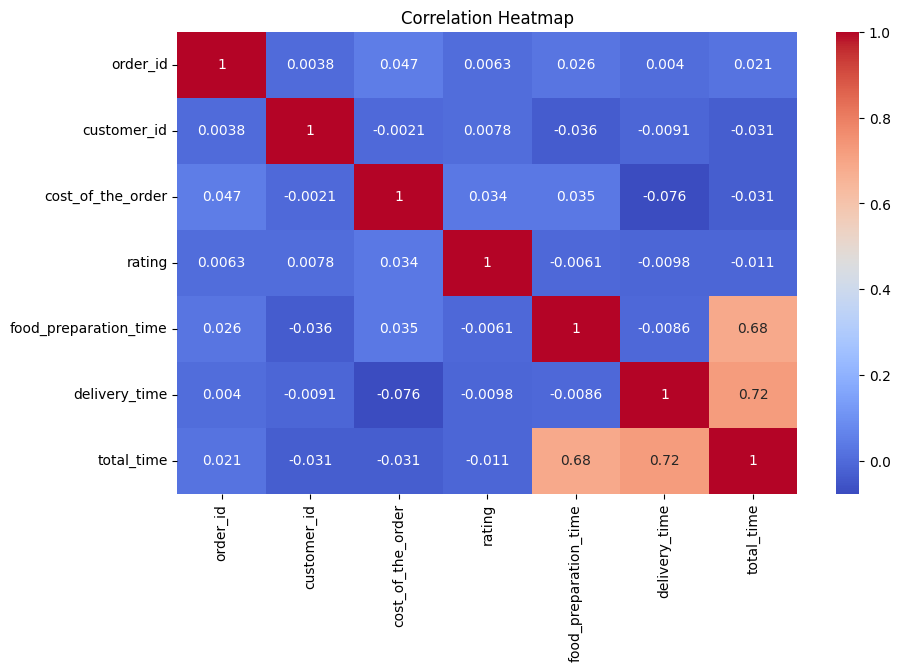

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 6))
# Calculate correlation matrix using only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

From this heatmap, I found that delivery time and food prep time have a high correlation to total time which makes sense. Delivery time has a higher correlation to total time which indicates that it is a better descriptive variable for total time.

Text(0.5, 0, 'Cost of the Order')

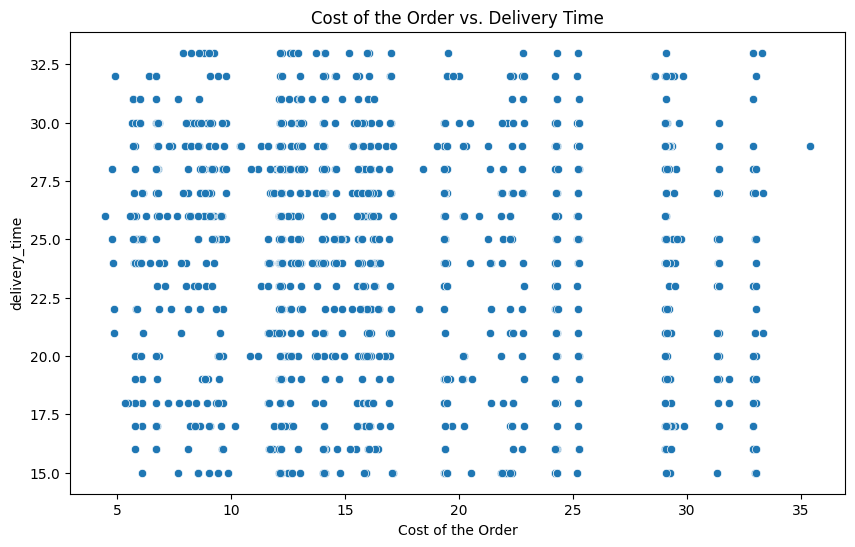

In [105]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cost_of_the_order', y='delivery_time', data=df)
plt.title('Cost of the Order vs. Delivery Time')
plt.xlabel('Cost of the Order')

Because cost of order and delivery time had a strong negative correlation I decided to make a scatterplot of the two variables to see what trends the data might have. Seems as though the delivery times are consistently hitting the same time marks which is fairly unusual. In other words, the y values are constant for the different x values. I feel like I would typically expect delivery time to vary more so this was pretty interesting.

In [106]:
df[['cost_of_the_order', 'delivery_time']].corr()

,cost_of_the_order,delivery_time
cost_of_the_order,1.000000,-0.075892
delivery_time,-0.075892,1.000000


In this case, the variables have a correlation of -0.075892 which means that, overall, there is a very weak inverse relationship between the two variables, which is likely not practically meaningful. Again, I am glad I did examine these variables because I found the trend in this scatterplot pretty interesting.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [57]:
print(df.head())

   order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24  


In [60]:

df = df[df['rating'] != 'not given']  # Remove rows with 'not given' values
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')  # Convert 'rating' column to numeric, errors will be coerced to NaN

# Drop rows where the rating is NaN after conversion (if any non-numeric values remain)
df = df.dropna(subset=['rating'])

# Group by restaurant and calculate the rating count and average rating
restaurant_stats = df.groupby('restaurant_name').agg(
    rating_count=('rating', 'size'),
    average_rating=('rating', 'mean')
)

# Filter restaurants that meet the criteria
promo_restaurants = restaurant_stats[(restaurant_stats['rating_count'] > 50) & (restaurant_stats['average_rating'] > 4)]

print(promo_restaurants)

                           rating_count  average_rating
restaurant_name                                        
Blue Ribbon Fried Chicken            64        4.328125
Blue Ribbon Sushi                    73        4.219178
Shake Shack                         133        4.278195
The Meatball Shop                    84        4.511905


#### Observations:
Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop have more than 50 ratings recieved with average ratings above 4.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [54]:
def calculate_fee(cost_of_the_order):
    if cost_of_the_order > 20:
        return cost_of_the_order * 0.25  # 25% fee for orders > $20
    elif cost_of_the_order > 5:
        return cost_of_the_order * 0.15  # 15% fee for orders > $5 and <= $20
    else:
        return 0  # No fee for orders <= $5

net_revenue = df['cost_of_the_order'].apply(calculate_fee).sum()
print(f"Net revenue generated by the company: ${net_revenue:.2f}")


Net revenue generated by the company: $6166.30


#### Observations:
The net revenue generated by the company is: $6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [65]:

df['total_time'] = df['delivery_time'] + df['food_preparation_time']

orders_above_60_min = df[df['total_time'] > 60]

percentage_above_60 = len(orders_above_60_min) / len(df) * 100

print(f"Percentage of orders that take more than 60 minutes to get delivered: {percentage_above_60:.2f}%")


Percentage of orders that take more than 60 minutes to get delivered: 10.24%


#### Observations:
10.24% of resturants in this data frame take over 60 minutes to prep and deliver their orders.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [37]:
weekend_data = df.loc[df['day_of_the_week']=='Weekend']
weekend_data.describe()


,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.351000e+03,1351.000000,1351.000000,1351.000000,1351.000000
mean,1.477500e+06,170422.561066,16.574833,27.436714,22.470022
std,5.541681e+02,113403.749068,7.486979,4.601476,4.628938
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477016e+06,77665.000000,12.080000,23.000000,18.500000
50%,1.477505e+06,127934.000000,14.410000,27.000000,22.000000
75%,1.477980e+06,268958.000000,22.285000,31.000000,27.000000
max,1.478444e+06,405334.000000,33.370000,35.000000,30.000000


In [38]:
weekday_data = df.loc[df['day_of_the_week']=='Weekday']
weekday_data.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,5.470000e+02,547.000000,547.000000,547.000000,547.000000
mean,1.477483e+06,173010.771481,16.311188,27.212066,28.340037
std,5.329454e+02,114505.333032,7.479521,4.708616,2.891428
min,1.476559e+06,5693.000000,4.750000,20.000000,24.000000
25%,1.477043e+06,78913.000000,12.080000,23.000000,26.000000
50%,1.477457e+06,130521.000000,14.070000,27.000000,28.000000
75%,1.477929e+06,276192.000000,22.285000,31.000000,31.000000
max,1.478435e+06,404649.000000,35.410000,35.000000,33.000000


#### Observations:
The average delivery time on the weekends is roughly 22 and a half minutes whereas the week days tend to be more busy, with an average delivery time of 28 minutes.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  By and large I kept finding that american cuisine was the most high in demand on both weekdays and weekends. Most orders were placed on the weekends, and shake shack was the most popular resturant with the most ratings and the best average rating.

### Recommendations:

With all of this in mind, we now know what is most popular in demand. American cuisine, particularly shake shack, especially on weekends. I suggest that the food aggregator company target those customers by puting out notifications or ads on weekends or weekdays that have catchy sayings that remind people to buy a cheeseburger and shake at shake shack. I would also suggest that the food aggregator company try to drive up sales of some of the other highly rated resturants or create an algorithym in the app that continues to suggest the most popular resturants that the company now knows everyone likes to improve customer satisfaction. This would build more trust between the customers and their usage of FoodHub.

Also, over 10% of orders took over an hour for delivery. This indicates potential delays or inefficiencies in the process (e.g., food prep time, delivery logistics). This could lead to disappointed customers who may rate the service poorly. My suggestion on this front is for the company to collaborate with restaurants to optimize delivery routes, adjust delivery time windows, or prioritize orders based on delivery time expectations. Reducing delivery time would not only improve customer satisfaction but also enhance the overall operational efficiency.

Another thing I noticed was that weekdays have a higher average delivery time (28min) compared to weekends (22.5min). The company can optimize its delivery network by ensuring more delivery personnel are available on weekdays, which are likely busier. Alternatively, restaurants could be encouraged to prepare food earlier during weekdays to accommodate demand.




---